In [4]:
from keras import layers 
from keras import models

In [5]:
from keras.datasets import imdb

## IMDB binary classification

In [24]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [25]:
train_data.shape , test_data.shape

((25000,), (25000,))

In [27]:
word_index = imdb.get_word_index()

In [28]:
reverse_word_index =  dict(
[(value,key) for (key,value) in word_index.items()])


In [29]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[1]])

In [30]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [20]:
train_labels[1]

0

### one hot encoding for the review words

In [21]:
import numpy as np

In [31]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [32]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
from keras import models
from keras import layers

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation =  'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [37]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['accuracy'])

In [38]:
x_val = x_train[:10000]
partial_x_train =  x_train[10000:]

In [39]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
history =  model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, 
                     validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 350us/step - loss: 0.5506 - acc: 0.7664 - val_loss: 0.4331 - val_acc: 0.8673
Epoch 2/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.3475 - acc: 0.8953 - val_loss: 0.3445 - val_acc: 0.8666
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2515 - acc: 0.9213 - val_loss: 0.2903 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1937 - acc: 0.9393 - val_loss: 0.2847 - val_acc: 0.8880
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1572 - acc: 0.9510 - val_loss: 0.2953 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1281 - acc: 0.9609 - val_loss: 0.2895 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1065 - acc: 0.9688 - val_loss: 0.3082 - v

In [41]:
import matplotlib.pyplot as plt


In [42]:
history_dict = history.history

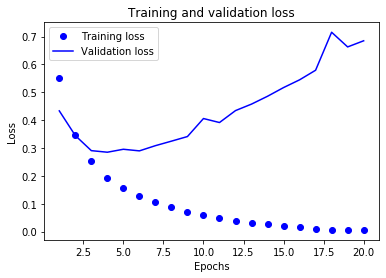

In [43]:
loss_values =  history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
plt.clf()

<Figure size 432x288 with 0 Axes>

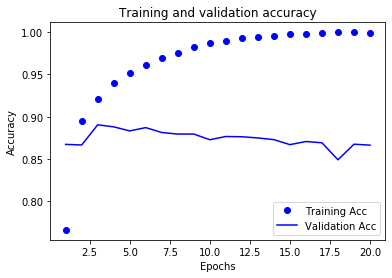

In [46]:
acc =  history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
model.predict(x_test)

array([[0.0079491 ],
       [1.        ],
       [0.99850994],
       ...,
       [0.01127004],
       [0.01945352],
       [0.974494  ]], dtype=float32)

### Classifying newswires: a multiclass classification example

single label - muliclass classification

multi label - multiclass classification


In [48]:
from keras.datasets import reuters


In [49]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [50]:
len(train_data)

8982

In [52]:
len(test_data)

2246

In [53]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 1s 1us/step


In [54]:
reverse_word_index =  dict(
[(value,key) for (key,value) in word_index.items()])

In [55]:
decoded_wire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[1]])

In [56]:
decoded_wire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [57]:
x_train =  vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [58]:
def to_one_hot(labels, dimensions = 46):
    results = np.zeros((len(labels),dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [59]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [61]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [62]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [65]:
x_val = x_train[:1000]
partial_x_train =  x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [66]:
history =  model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, 
                     validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 296us/step - loss: 2.5312 - acc: 0.5292 - val_loss: 1.6581 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 135us/step - loss: 1.3781 - acc: 0.7096 - val_loss: 1.2750 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.0424 - acc: 0.7774 - val_loss: 1.1146 - val_acc: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.8322 - acc: 0.8198 - val_loss: 1.0173 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.6663 - acc: 0.8579 - val_loss: 0.9547 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.5386 - acc: 0.8864 - val_loss: 0.9189 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.4397 - acc: 0.9062 - val_loss: 0.9071 - val_acc: 0.7980


In [67]:
history_dict = history.history

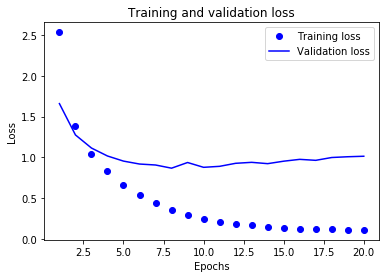

In [68]:
loss_values =  history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

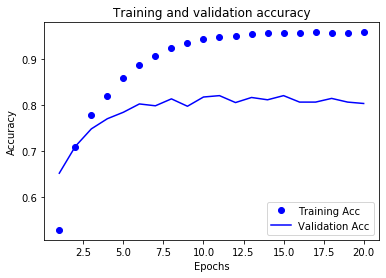

In [69]:
plt.clf()
acc =  history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Retraining model from scratch

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [71]:
history =  model.fit(partial_x_train, partial_y_train, epochs= 9 , batch_size= 512, 
                     validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 273us/step - loss: 2.5397 - acc: 0.5224 - val_loss: 1.6729 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.3717 - acc: 0.7117 - val_loss: 1.2760 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.0142 - acc: 0.7788 - val_loss: 1.1337 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.7986 - acc: 0.8250 - val_loss: 1.0554 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.6399 - acc: 0.8626 - val_loss: 0.9772 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5116 - acc: 0.8925 - val_loss: 0.9098 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.4110 - acc: 0.9152 - val_loss: 0.8922 - val_acc: 0.8200
Epoch 8

In [72]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 266us/step


In [73]:
results 

[1.02247830702594, 0.7764915405695499]

In [74]:
predictions   = model.predict(x_test)

In [75]:
predictions[0].shape

(46,)

In [76]:
np.sum(predictions[0])

1.0000006

In [77]:
np.argmax(predictions[0])

3